In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

# Imports

In [2]:
df = pd.read_csv('../clustering_data_with_noout_cols.csv')
df = df.drop(columns=['Area Code'])
df = df.replace([np.inf, -np.inf], np.nan)
targets = ['mean_happiness_3clusters', 'mean_happiness_binary', 'mean_happiness']

df['mean_happiness_binary'] = df['mean_happiness_binary'].replace(-1, 0)

In [3]:
code_cols = [col for col in df if col.startswith('Code')]
df.drop(columns=code_cols, inplace=True)

region_cols = [col for col in df if col.startswith('region')]
df.drop(columns=region_cols, inplace=True)

columns = df.columns[~df.columns.isin(targets)]

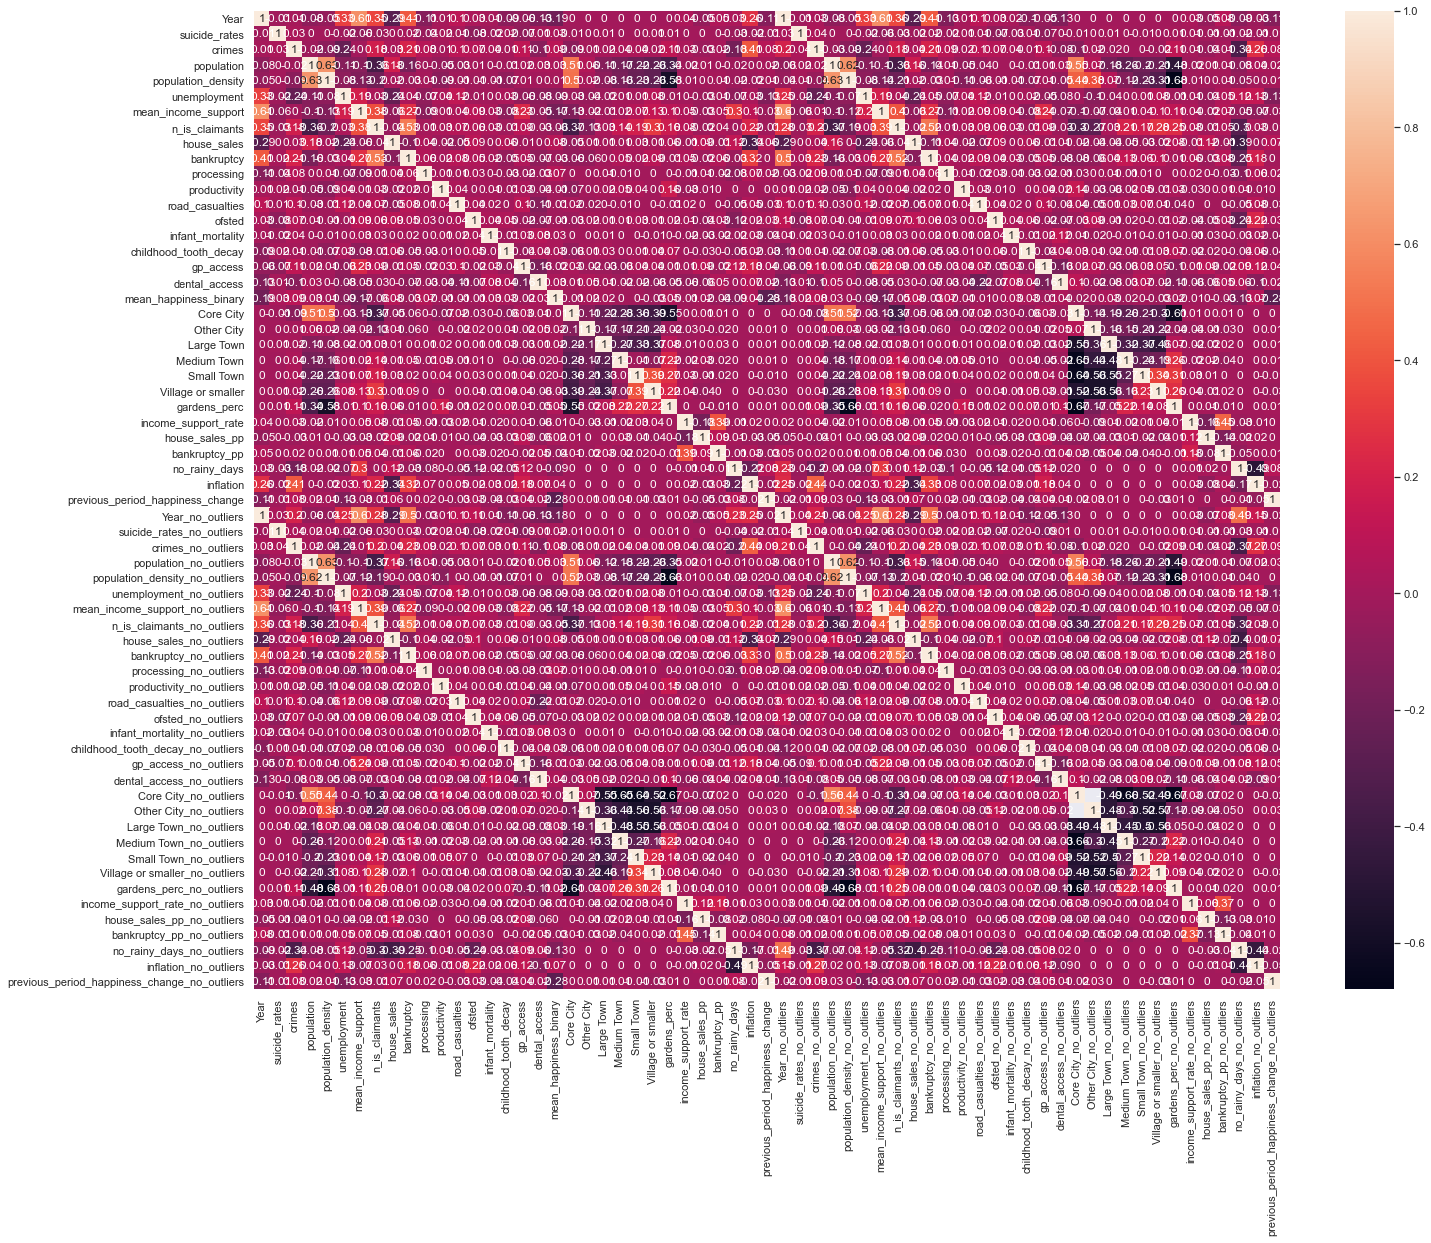

In [4]:
sns.set(rc={'figure.figsize':(23,18)})

corr = df.corr().round(2)
corr = corr.replace(-0, 0)
sns.set(font_scale = 1)

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

# Normlaize

In [5]:
df = df.copy()
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])
df

,Year,suicide_rates,crimes,population,population_density,unemployment,mean_income_support,n_is_claimants,house_sales,bankruptcy,...,Medium Town_no_outliers,Small Town_no_outliers,Village or smaller_no_outliers,gardens_perc_no_outliers,income_support_rate_no_outliers,house_sales_pp_no_outliers,bankruptcy_pp_no_outliers,no_rainy_days_no_outliers,inflation_no_outliers,previous_period_happiness_change_no_outliers
0,0.0,0.413043,0.643016,0.283647,0.333341,0.825166,0.367917,NaN,0.394243,0.351220,...,0.390156,0.299512,0.499300,0.952113,NaN,0.617708,0.397541,1.00,NaN,NaN
1,0.0,0.536232,0.624579,0.213976,0.332165,0.774949,0.387443,0.919931,0.378678,0.726829,...,NaN,NaN,0.146937,0.971831,0.313371,0.597082,0.444721,1.00,NaN,NaN
2,0.0,0.557971,0.642726,0.227104,0.334876,0.579632,0.371746,0.891516,0.374414,0.741463,...,NaN,NaN,0.040397,0.952113,0.205163,0.622299,0.404467,1.00,NaN,NaN
3,0.0,0.550725,0.630755,0.236665,0.340641,0.663483,0.365620,0.821798,0.396588,0.658537,...,NaN,NaN,0.008635,0.966197,0.213187,0.623654,0.397941,1.00,NaN,NaN
4,0.0,0.565217,0.662993,0.229068,0.332708,0.648849,0.396631,0.847575,0.332836,0.560976,...,0.334259,0.418393,0.450804,0.915493,0.197904,0.605711,0.363194,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,1.0,NaN,NaN,0.215061,0.332632,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.194062,0.378788
3425,1.0,NaN,NaN,0.241420,0.333727,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.194062,0.303030
3426,1.0,NaN,NaN,0.226897,0.332849,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.194062,0.388889
3427,1.0,NaN,NaN,0.240128,0.332936,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.194062,0.681818


# Export with Nans

In [6]:
print(df.shape)

y = df['mean_happiness_binary']
X = df[columns]

#Splitting into train test validate, 80 : 10 : 10
X_train, X_remaining, y_train, y_remaining = train_test_split(X,y, train_size=0.8, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

print(len(X_train))
print(len(y_train))

X_train.to_csv('../processed_data/outliers_removed/with_nans/x_train.csv', index=False)
y_train.to_csv('../processed_data/outliers_removed/with_nans/y_train.csv', index=False)

X_test.to_csv('../processed_data/outliers_removed/with_nans/X_test.csv', index=False)
y_test.to_csv('../processed_data/outliers_removed/with_nans/y_test.csv', index=False)

X_valid.to_csv('../processed_data/outliers_removed/with_nans/X_valid.csv', index=False)
y_valid.to_csv('../processed_data/outliers_removed/with_nans/y_valid.csv', index=False)

(3429, 63)
2743
2743


# Imputation

In [7]:
for method in ['most_frequent', 'mean', 'median']:
    #imputing training data
    imputed_train = SimpleImputer(strategy=method).fit_transform(X_train)
    x_train_imputed = pd.DataFrame(imputed_train, columns=X_train.columns)
    
    #imputing testing data
    X_full = X_test.append(X_train)
    imputed_full = SimpleImputer(strategy=method).fit_transform(X_full)
    x_full_imputed = pd.DataFrame(imputed_full, columns=X_test.columns)
    x_test_imputed = x_full_imputed[:len(X_test)]
    
    x_test_imputed.to_excel(f'../processed_data/outliers_removed/imputed/{method}/x_test.xlsx', index=False)
    x_train_imputed.to_excel(f'../processed_data/outliers_removed/imputed/{method}/x_train.xlsx', index=False)
    pd.Series(y_train).to_excel(f'../processed_data/outliers_removed/imputed/{method}/y_train.xlsx', index=False)
    pd.Series(y_test).to_excel(f'../processed_data/outliers_removed/imputed/{method}/y_test.xlsx', index=False)

# KNN

In [8]:
import xgboost as xgb
from xgboost import XGBClassifier

imputer = KNNImputer(n_neighbors=50, weights='distance')

# imputing training
imputer.fit(X_train)
X_train_knn = imputer.transform(X_train)
X_train_knn_df = pd.DataFrame(X_train_knn, columns=X_train.columns)

# imputing test data
X_full = X_test.append(X_train)
X_full_imputed = imputer.fit_transform(X_full)
X_full_knn_df = pd.DataFrame(X_full_imputed, columns=X_full.columns)
X_test_knn_df = X_full_knn_df[:len(X_test)]

method='knn'

X_test_knn_df.to_excel(f'../processed_data/outliers_removed/imputed/{method}/x_test.xlsx', index=False)
X_train_knn_df.to_excel(f'../processed_data/outliers_removed/imputed/{method}/x_train.xlsx', index=False)
pd.Series(y_train).to_excel(f'../processed_data/outliers_removed/imputed/{method}/y_train.xlsx', index=False)
pd.Series(y_test).to_excel(f'../processed_data/outliers_removed/imputed/{method}/y_test.xlsx', index=False)